# EXTRACCION DE DATOS

## LIBRERIAS Y LLAMADO DE BASE DE DATOS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from funpymodeling.exploratory import freq_tbl
import re

In [2]:
df=pd.read_excel("microretailer_mit_lift_lab.xlsx")
df2=pd.read_excel("consumer_mit_lift_lab.xlsx")

## SELECCION DE VARIABLES Y ANALISIS GENERAL

In [3]:
df_sel=df.loc[: ,["Tipo_tienda","Exibir_productos","Vende_prod_fresco","Clientes_en_tienda","Dispositivos_tienda","Fecha_creacion","Espacio_tienda","Incremento_salarios","Registros_inventarios","Competidores_directos","Metodos_pago","Herramientas_relacion_cliente","Promedio marginal","Servicios","Por que no_S","Cambios_pandemia","Freq_org_casilleros","Forma_organizar_casilleros","Invertir_tecnologia_operacion","Voluntad_participar_tienda"]]

In [4]:
df_cho=df2.loc[: ,["llena_nececidades","Distancia_recorrida","Transporte_tienda","Genero","Tipo_tienda_concurr"]]

In [5]:
df_sel

,Tipo_tienda,Exibir_productos,Vende_prod_fresco,Clientes_en_tienda,Dispositivos_tienda,Fecha_creacion,Espacio_tienda,Incremento_salarios,Registros_inventarios,Competidores_directos,Metodos_pago,Herramientas_relacion_cliente,Promedio marginal,Servicios,Por que no_S,Cambios_pandemia,Freq_org_casilleros,Forma_organizar_casilleros,Invertir_tecnologia_operacion,Voluntad_participar_tienda
0,Tailor,no,no,2,POS system (i.e. computer + bar code scanner +...,2021-04-12,No cambió,No cambió,Software especializado + computadora,3.0,"Efectivo,Transferencia interbancaria",Redes sociales,NaN,NaN,NaN,NaN,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",NaN,no
1,Grocery store (aka. nanostore),yes,yes,0,Dataphone (i.e. card payments),2012-08-12,Aumentó 15%,No cambió,No lo hago,4.0,"Efectivo,Transferencia interbancaria",Aplicación móvil,NaN,NaN,NaN,NaN,NaN,"Categoría (e.g. limpieza, aseo personal, comes...",NaN,no
2,Grocery store (aka. nanostore),no,no,0,"Dataphone (i.e. card payments),POS system (i.e...",2022-08-12,No cambió,No cambió,En Excel,0.0,"Efectivo,Tarjeta de débito y/o crédito",Redes sociales,NaN,NaN,NaN,NaN,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",NaN,no
3,Grocery store (aka. nanostore),no,no,0,POS system (i.e. computer + bar code scanner +...,2008-11-12,No cambió,No cambió,Software especializado + computadora,4.0,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,NaN,NaN,NaN,NaN,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",NaN,no
4,Grocery store (aka. nanostore),no,no,0,Smartphone,2007-10-12,No cambió,No cambió,En papel,0.0,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",NaN,NaN,NaN,NaN,NaN,Mensualmente,Venta cruzada (e.g. cereal + leche),NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Grocery store (aka. nanostore),no,no,1,"Analog cash register,Smartphone",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,Grocery store (aka. nanostore),no,no,1,"Analog cash register,Smartphone",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,Micro-restaurant (aka. fondita),no,yes,3,Smartphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,Micro-restaurant (aka. fondita),no,yes,0,Analog cash register,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_sel.info

<bound method DataFrame.info of                          Tipo_tienda Exibir_productos Vende_prod_fresco  \
0                             Tailor               no                no   
1     Grocery store (aka. nanostore)              yes               yes   
2     Grocery store (aka. nanostore)               no                no   
3     Grocery store (aka. nanostore)               no                no   
4     Grocery store (aka. nanostore)               no                no   
..                               ...              ...               ...   
166   Grocery store (aka. nanostore)               no                no   
167   Grocery store (aka. nanostore)               no                no   
168  Micro-restaurant (aka. fondita)               no               yes   
169  Micro-restaurant (aka. fondita)               no               yes   
170  Micro-restaurant (aka. fondita)               no               yes   

     Clientes_en_tienda                                Dispositivos

In [7]:
df_cho

,llena_nececidades,Distancia_recorrida,Transporte_tienda,Genero,Tipo_tienda_concurr
0,no,0 a 3 cuadras,A pie,Male,Cafeteria
1,yes,7 a 10 cuadras,A pie,Female,Grocery store (aka. nanostore)
2,yes,más de 10 cuadras,Automóvil,Female,Micro-restaurant (aka. fondita)
3,yes,4 a 6 cuadras,Motocicleta,Female,Cafeteria
4,yes,más de 10 cuadras,Transporte público,Female,Cafeteria
...,...,...,...,...,...
110,yes,20 min,Automóvil,Male,Micro-restaurant (aka. fondita)
111,yes,30 min,Transporte público,Female,Cafeteria
112,yes,0 a 3 cuadras,A pie,Male,Cafeteria
113,yes,más de 10 cuadras,Didi,Male,Cafeteria


In [8]:
df_cho.info

<bound method DataFrame.info of     llena_nececidades Distancia_recorrida   Transporte_tienda  Genero  \
0                  no       0 a 3 cuadras               A pie    Male   
1                 yes      7 a 10 cuadras               A pie  Female   
2                 yes   más de 10 cuadras           Automóvil  Female   
3                 yes       4 a 6 cuadras         Motocicleta  Female   
4                 yes   más de 10 cuadras  Transporte público  Female   
..                ...                 ...                 ...     ...   
110               yes              20 min           Automóvil    Male   
111               yes              30 min  Transporte público  Female   
112               yes       0 a 3 cuadras               A pie    Male   
113               yes   más de 10 cuadras                Didi    Male   
114               yes       4 a 6 cuadras  Transporte público    Male   

                 Tipo_tienda_concurr  
0                          Cafeteria  
1     Grocery

## LIMPIEZA DE DATOS

In [9]:
df_sel.isnull().sum()


Tipo_tienda                        0
Exibir_productos                   0
Vende_prod_fresco                  0
Clientes_en_tienda                 0
Dispositivos_tienda                6
Fecha_creacion                    59
Espacio_tienda                    72
Incremento_salarios               86
Registros_inventarios             61
Competidores_directos             68
Metodos_pago                      64
Herramientas_relacion_cliente     76
Promedio marginal                105
Servicios                         94
Por que no_S                     130
Cambios_pandemia                 148
Freq_org_casilleros               75
Forma_organizar_casilleros        79
Invertir_tecnologia_operacion     97
Voluntad_participar_tienda        73
dtype: int64

In [10]:
x=df_sel["Dispositivos_tienda"].mode()
print(x)
df_sel["Dispositivos_tienda"].fillna("Smartphone",inplace = True)
df_sel.isnull().sum()

0    Smartphone
Name: Dispositivos_tienda, dtype: object


Tipo_tienda                        0
Exibir_productos                   0
Vende_prod_fresco                  0
Clientes_en_tienda                 0
Dispositivos_tienda                0
Fecha_creacion                    59
Espacio_tienda                    72
Incremento_salarios               86
Registros_inventarios             61
Competidores_directos             68
Metodos_pago                      64
Herramientas_relacion_cliente     76
Promedio marginal                105
Servicios                         94
Por que no_S                     130
Cambios_pandemia                 148
Freq_org_casilleros               75
Forma_organizar_casilleros        79
Invertir_tecnologia_operacion     97
Voluntad_participar_tienda        73
dtype: int64

In [11]:
x=df_sel["Voluntad_participar_tienda"].mode()
print(x)
df_sel["Voluntad_participar_tienda"].fillna("yes",inplace = True)
df_sel.isnull().sum()

0     no
1    yes
Name: Voluntad_participar_tienda, dtype: object


Tipo_tienda                        0
Exibir_productos                   0
Vende_prod_fresco                  0
Clientes_en_tienda                 0
Dispositivos_tienda                0
Fecha_creacion                    59
Espacio_tienda                    72
Incremento_salarios               86
Registros_inventarios             61
Competidores_directos             68
Metodos_pago                      64
Herramientas_relacion_cliente     76
Promedio marginal                105
Servicios                         94
Por que no_S                     130
Cambios_pandemia                 148
Freq_org_casilleros               75
Forma_organizar_casilleros        79
Invertir_tecnologia_operacion     97
Voluntad_participar_tienda         0
dtype: int64

In [12]:
df_sel["Fecha_creacion"].fillna("Nd",inplace = True)
df_sel.isnull().sum()

Tipo_tienda                        0
Exibir_productos                   0
Vende_prod_fresco                  0
Clientes_en_tienda                 0
Dispositivos_tienda                0
Fecha_creacion                     0
Espacio_tienda                    72
Incremento_salarios               86
Registros_inventarios             61
Competidores_directos             68
Metodos_pago                      64
Herramientas_relacion_cliente     76
Promedio marginal                105
Servicios                         94
Por que no_S                     130
Cambios_pandemia                 148
Freq_org_casilleros               75
Forma_organizar_casilleros        79
Invertir_tecnologia_operacion     97
Voluntad_participar_tienda         0
dtype: int64

In [13]:
df_sel2=df_sel=df_sel.loc[: ,["Tipo_tienda","Exibir_productos","Vende_prod_fresco","Clientes_en_tienda","Dispositivos_tienda","Fecha_creacion","Espacio_tienda","Incremento_salarios","Registros_inventarios","Competidores_directos","Metodos_pago","Herramientas_relacion_cliente","Freq_org_casilleros","Forma_organizar_casilleros","Voluntad_participar_tienda"]]
df_sel2.isnull().sum()

Tipo_tienda                       0
Exibir_productos                  0
Vende_prod_fresco                 0
Clientes_en_tienda                0
Dispositivos_tienda               0
Fecha_creacion                    0
Espacio_tienda                   72
Incremento_salarios              86
Registros_inventarios            61
Competidores_directos            68
Metodos_pago                     64
Herramientas_relacion_cliente    76
Freq_org_casilleros              75
Forma_organizar_casilleros       79
Voluntad_participar_tienda        0
dtype: int64

In [14]:
x=df_sel2["Espacio_tienda"].mode()
print(x)
df_sel2["Espacio_tienda"].fillna("No cambió",inplace = True)
df_sel2.isnull().sum()

0    No cambió
Name: Espacio_tienda, dtype: object


Tipo_tienda                       0
Exibir_productos                  0
Vende_prod_fresco                 0
Clientes_en_tienda                0
Dispositivos_tienda               0
Fecha_creacion                    0
Espacio_tienda                    0
Incremento_salarios              86
Registros_inventarios            61
Competidores_directos            68
Metodos_pago                     64
Herramientas_relacion_cliente    76
Freq_org_casilleros              75
Forma_organizar_casilleros       79
Voluntad_participar_tienda        0
dtype: int64

In [15]:
x=df_sel2["Incremento_salarios"].mode()
print(x)
df_sel2["Incremento_salarios"].fillna("No cambió",inplace = True)
df_sel2.isnull().sum()

0    No cambió
Name: Incremento_salarios, dtype: object


Tipo_tienda                       0
Exibir_productos                  0
Vende_prod_fresco                 0
Clientes_en_tienda                0
Dispositivos_tienda               0
Fecha_creacion                    0
Espacio_tienda                    0
Incremento_salarios               0
Registros_inventarios            61
Competidores_directos            68
Metodos_pago                     64
Herramientas_relacion_cliente    76
Freq_org_casilleros              75
Forma_organizar_casilleros       79
Voluntad_participar_tienda        0
dtype: int64

In [16]:
x=df_sel2["Registros_inventarios"].mode()
print(x)
df_sel2["Registros_inventarios"].fillna("No cambió",inplace = True)
df_sel2.isnull().sum()

0    En papel
Name: Registros_inventarios, dtype: object


Tipo_tienda                       0
Exibir_productos                  0
Vende_prod_fresco                 0
Clientes_en_tienda                0
Dispositivos_tienda               0
Fecha_creacion                    0
Espacio_tienda                    0
Incremento_salarios               0
Registros_inventarios             0
Competidores_directos            68
Metodos_pago                     64
Herramientas_relacion_cliente    76
Freq_org_casilleros              75
Forma_organizar_casilleros       79
Voluntad_participar_tienda        0
dtype: int64

In [17]:
#Al tener como moda los 3 valores que son 1,2,3 por igual se decide llenar los faltantes con 0 y quitar la mayoria con la limpieza de atipicos ya que si los llenamos con otros afactara en gran medida al analisis
x=df_sel2["Competidores_directos"].mode()
print(x)
df_sel2["Competidores_directos"].fillna(0,inplace = True)
df_sel2.isnull().sum()

0    1.0
1    2.0
2    3.0
Name: Competidores_directos, dtype: float64


Tipo_tienda                       0
Exibir_productos                  0
Vende_prod_fresco                 0
Clientes_en_tienda                0
Dispositivos_tienda               0
Fecha_creacion                    0
Espacio_tienda                    0
Incremento_salarios               0
Registros_inventarios             0
Competidores_directos             0
Metodos_pago                     64
Herramientas_relacion_cliente    76
Freq_org_casilleros              75
Forma_organizar_casilleros       79
Voluntad_participar_tienda        0
dtype: int64

In [18]:
x=df_sel2["Metodos_pago"].mode()
print(x)
df_sel2["Metodos_pago"].fillna("Efectivo",inplace = True)
df_sel2.isnull().sum()

0    Efectivo
Name: Metodos_pago, dtype: object


Tipo_tienda                       0
Exibir_productos                  0
Vende_prod_fresco                 0
Clientes_en_tienda                0
Dispositivos_tienda               0
Fecha_creacion                    0
Espacio_tienda                    0
Incremento_salarios               0
Registros_inventarios             0
Competidores_directos             0
Metodos_pago                      0
Herramientas_relacion_cliente    76
Freq_org_casilleros              75
Forma_organizar_casilleros       79
Voluntad_participar_tienda        0
dtype: int64

In [19]:
x=df_sel2["Herramientas_relacion_cliente"].mode()
print(x)
df_sel2["Herramientas_relacion_cliente"].fillna("Redes sociales",inplace = True)
df_sel2.isnull().sum()

0    Redes sociales
Name: Herramientas_relacion_cliente, dtype: object


Tipo_tienda                       0
Exibir_productos                  0
Vende_prod_fresco                 0
Clientes_en_tienda                0
Dispositivos_tienda               0
Fecha_creacion                    0
Espacio_tienda                    0
Incremento_salarios               0
Registros_inventarios             0
Competidores_directos             0
Metodos_pago                      0
Herramientas_relacion_cliente     0
Freq_org_casilleros              75
Forma_organizar_casilleros       79
Voluntad_participar_tienda        0
dtype: int64

In [20]:
x=df_sel2["Freq_org_casilleros"].mode()
print(x)
df_sel2["Freq_org_casilleros"].fillna("Semanalmente",inplace = True)
df_sel2.isnull().sum()

0    Semanalmente
Name: Freq_org_casilleros, dtype: object


Tipo_tienda                       0
Exibir_productos                  0
Vende_prod_fresco                 0
Clientes_en_tienda                0
Dispositivos_tienda               0
Fecha_creacion                    0
Espacio_tienda                    0
Incremento_salarios               0
Registros_inventarios             0
Competidores_directos             0
Metodos_pago                      0
Herramientas_relacion_cliente     0
Freq_org_casilleros               0
Forma_organizar_casilleros       79
Voluntad_participar_tienda        0
dtype: int64

In [21]:
x=df_sel2["Forma_organizar_casilleros"].mode()
print(x)
df_sel2["Forma_organizar_casilleros"].fillna("Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.)",inplace = True)
df_sel2.isnull().sum()

0    Categoría (e.g. limpieza, aseo personal, comes...
Name: Forma_organizar_casilleros, dtype: object


Tipo_tienda                      0
Exibir_productos                 0
Vende_prod_fresco                0
Clientes_en_tienda               0
Dispositivos_tienda              0
Fecha_creacion                   0
Espacio_tienda                   0
Incremento_salarios              0
Registros_inventarios            0
Competidores_directos            0
Metodos_pago                     0
Herramientas_relacion_cliente    0
Freq_org_casilleros              0
Forma_organizar_casilleros       0
Voluntad_participar_tienda       0
dtype: int64

In [22]:
df_cho.isnull().sum()

llena_nececidades      0
Distancia_recorrida    0
Transporte_tienda      0
Genero                 0
Tipo_tienda_concurr    0
dtype: int64

## IDENTIFICACION DE ATIPICOS

In [23]:
clnsng=df_sel2.loc[: ,["Clientes_en_tienda","Competidores_directos"]]

In [24]:
th=df_sel2.drop(["Clientes_en_tienda","Competidores_directos"],axis=1)
th

,Tipo_tienda,Exibir_productos,Vende_prod_fresco,Dispositivos_tienda,Fecha_creacion,Espacio_tienda,Incremento_salarios,Registros_inventarios,Metodos_pago,Herramientas_relacion_cliente,Freq_org_casilleros,Forma_organizar_casilleros,Voluntad_participar_tienda
0,Tailor,no,no,POS system (i.e. computer + bar code scanner +...,2021-04-12,No cambió,No cambió,Software especializado + computadora,"Efectivo,Transferencia interbancaria",Redes sociales,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
1,Grocery store (aka. nanostore),yes,yes,Dataphone (i.e. card payments),2012-08-12,Aumentó 15%,No cambió,No lo hago,"Efectivo,Transferencia interbancaria",Aplicación móvil,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
2,Grocery store (aka. nanostore),no,no,"Dataphone (i.e. card payments),POS system (i.e...",2022-08-12,No cambió,No cambió,En Excel,"Efectivo,Tarjeta de débito y/o crédito",Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
3,Grocery store (aka. nanostore),no,no,POS system (i.e. computer + bar code scanner +...,2008-11-12,No cambió,No cambió,Software especializado + computadora,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
4,Grocery store (aka. nanostore),no,no,Smartphone,2007-10-12,No cambió,No cambió,En papel,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Redes sociales,Mensualmente,Venta cruzada (e.g. cereal + leche),no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Grocery store (aka. nanostore),no,no,"Analog cash register,Smartphone",Nd,No cambió,No cambió,No cambió,Efectivo,Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",yes
167,Grocery store (aka. nanostore),no,no,"Analog cash register,Smartphone",Nd,No cambió,No cambió,No cambió,Efectivo,Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",yes
168,Micro-restaurant (aka. fondita),no,yes,Smartphone,Nd,No cambió,No cambió,No cambió,Efectivo,Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",yes
169,Micro-restaurant (aka. fondita),no,yes,Analog cash register,Nd,No cambió,No cambió,No cambió,Efectivo,Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",yes


<Axes: >

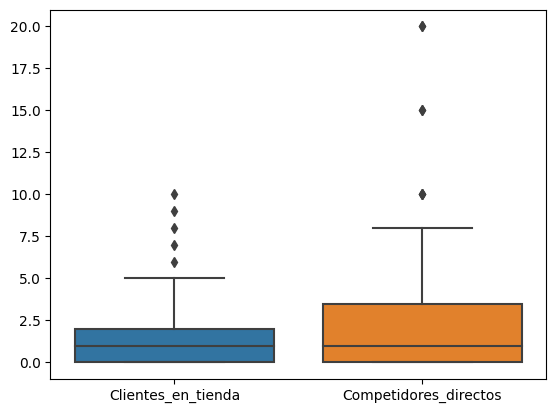

In [25]:
sns.boxplot(data=clnsng)

In [26]:
y = clnsng
percentile25 = y.quantile(0.25)
percentile75 = y.quantile(0.75)
iqr = percentile75 - percentile25
lower_bound = percentile25 - (1.5 * iqr)
upper_bound = percentile75 + (1.5 * iqr)
cleaned_data2 = clnsng[(clnsng >= lower_bound) & (clnsng <= upper_bound)]

print(cleaned_data2)

     Clientes_en_tienda  Competidores_directos
0                   2.0                    3.0
1                   0.0                    4.0
2                   0.0                    0.0
3                   0.0                    4.0
4                   0.0                    0.0
..                  ...                    ...
166                 1.0                    0.0
167                 1.0                    0.0
168                 3.0                    0.0
169                 0.0                    0.0
170                 1.0                    0.0

[171 rows x 2 columns]


In [27]:
cleaned_data2.isnull().sum()

Clientes_en_tienda       5
Competidores_directos    7
dtype: int64

In [28]:
x=cleaned_data2["Clientes_en_tienda"].mean()
print(x)
cleaned_data2["Clientes_en_tienda"].fillna(x,inplace = True)
cleaned_data2.isnull().sum()

1.1927710843373494


Clientes_en_tienda       0
Competidores_directos    7
dtype: int64

In [29]:
x=cleaned_data2["Competidores_directos"].mean()
print(x)
cleaned_data2["Competidores_directos"].fillna(x,inplace = True)
cleaned_data2.isnull().sum()

1.75


Clientes_en_tienda       0
Competidores_directos    0
dtype: int64

<Axes: >

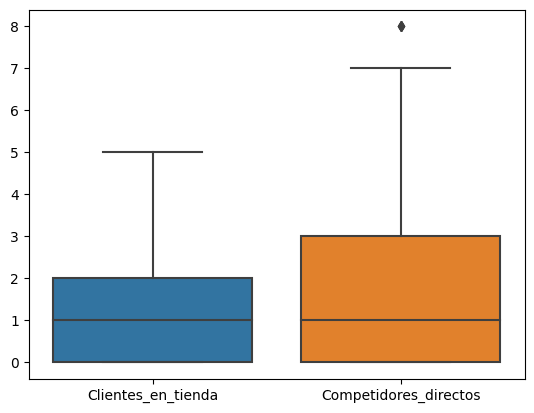

In [30]:
sns.boxplot(data=cleaned_data2)

In [31]:
Fdf = pd.concat([cleaned_data2, th], axis=1)
Fdf

,Clientes_en_tienda,Competidores_directos,Tipo_tienda,Exibir_productos,Vende_prod_fresco,Dispositivos_tienda,Fecha_creacion,Espacio_tienda,Incremento_salarios,Registros_inventarios,Metodos_pago,Herramientas_relacion_cliente,Freq_org_casilleros,Forma_organizar_casilleros,Voluntad_participar_tienda
0,2.0,3.0,Tailor,no,no,POS system (i.e. computer + bar code scanner +...,2021-04-12,No cambió,No cambió,Software especializado + computadora,"Efectivo,Transferencia interbancaria",Redes sociales,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
1,0.0,4.0,Grocery store (aka. nanostore),yes,yes,Dataphone (i.e. card payments),2012-08-12,Aumentó 15%,No cambió,No lo hago,"Efectivo,Transferencia interbancaria",Aplicación móvil,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
2,0.0,0.0,Grocery store (aka. nanostore),no,no,"Dataphone (i.e. card payments),POS system (i.e...",2022-08-12,No cambió,No cambió,En Excel,"Efectivo,Tarjeta de débito y/o crédito",Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
3,0.0,4.0,Grocery store (aka. nanostore),no,no,POS system (i.e. computer + bar code scanner +...,2008-11-12,No cambió,No cambió,Software especializado + computadora,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
4,0.0,0.0,Grocery store (aka. nanostore),no,no,Smartphone,2007-10-12,No cambió,No cambió,En papel,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Redes sociales,Mensualmente,Venta cruzada (e.g. cereal + leche),no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1.0,0.0,Grocery store (aka. nanostore),no,no,"Analog cash register,Smartphone",Nd,No cambió,No cambió,No cambió,Efectivo,Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",yes
167,1.0,0.0,Grocery store (aka. nanostore),no,no,"Analog cash register,Smartphone",Nd,No cambió,No cambió,No cambió,Efectivo,Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",yes
168,3.0,0.0,Micro-restaurant (aka. fondita),no,yes,Smartphone,Nd,No cambió,No cambió,No cambió,Efectivo,Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",yes
169,0.0,0.0,Micro-restaurant (aka. fondita),no,yes,Analog cash register,Nd,No cambió,No cambió,No cambió,Efectivo,Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",yes


In [32]:
Fdf.to_csv("Microretailer_CLEAN.csv")

In [33]:
df_cho.to_csv("Consumer_CLEAN.csv")

### SEPARACIÓN POR "," DE OBSERVACIONES CONJUNTAS Y DETALLADO DE LIMPIEZA

In [34]:
Fdf

,Clientes_en_tienda,Competidores_directos,Tipo_tienda,Exibir_productos,Vende_prod_fresco,Dispositivos_tienda,Fecha_creacion,Espacio_tienda,Incremento_salarios,Registros_inventarios,Metodos_pago,Herramientas_relacion_cliente,Freq_org_casilleros,Forma_organizar_casilleros,Voluntad_participar_tienda
0,2.0,3.0,Tailor,no,no,POS system (i.e. computer + bar code scanner +...,2021-04-12,No cambió,No cambió,Software especializado + computadora,"Efectivo,Transferencia interbancaria",Redes sociales,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
1,0.0,4.0,Grocery store (aka. nanostore),yes,yes,Dataphone (i.e. card payments),2012-08-12,Aumentó 15%,No cambió,No lo hago,"Efectivo,Transferencia interbancaria",Aplicación móvil,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
2,0.0,0.0,Grocery store (aka. nanostore),no,no,"Dataphone (i.e. card payments),POS system (i.e...",2022-08-12,No cambió,No cambió,En Excel,"Efectivo,Tarjeta de débito y/o crédito",Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
3,0.0,4.0,Grocery store (aka. nanostore),no,no,POS system (i.e. computer + bar code scanner +...,2008-11-12,No cambió,No cambió,Software especializado + computadora,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
4,0.0,0.0,Grocery store (aka. nanostore),no,no,Smartphone,2007-10-12,No cambió,No cambió,En papel,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Redes sociales,Mensualmente,Venta cruzada (e.g. cereal + leche),no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1.0,0.0,Grocery store (aka. nanostore),no,no,"Analog cash register,Smartphone",Nd,No cambió,No cambió,No cambió,Efectivo,Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",yes
167,1.0,0.0,Grocery store (aka. nanostore),no,no,"Analog cash register,Smartphone",Nd,No cambió,No cambió,No cambió,Efectivo,Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",yes
168,3.0,0.0,Micro-restaurant (aka. fondita),no,yes,Smartphone,Nd,No cambió,No cambió,No cambió,Efectivo,Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",yes
169,0.0,0.0,Micro-restaurant (aka. fondita),no,yes,Analog cash register,Nd,No cambió,No cambió,No cambió,Efectivo,Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",yes


In [35]:
df_cho

,llena_nececidades,Distancia_recorrida,Transporte_tienda,Genero,Tipo_tienda_concurr
0,no,0 a 3 cuadras,A pie,Male,Cafeteria
1,yes,7 a 10 cuadras,A pie,Female,Grocery store (aka. nanostore)
2,yes,más de 10 cuadras,Automóvil,Female,Micro-restaurant (aka. fondita)
3,yes,4 a 6 cuadras,Motocicleta,Female,Cafeteria
4,yes,más de 10 cuadras,Transporte público,Female,Cafeteria
...,...,...,...,...,...
110,yes,20 min,Automóvil,Male,Micro-restaurant (aka. fondita)
111,yes,30 min,Transporte público,Female,Cafeteria
112,yes,0 a 3 cuadras,A pie,Male,Cafeteria
113,yes,más de 10 cuadras,Didi,Male,Cafeteria


In [36]:
Fdf['Incremento_salarios'] = Fdf['Incremento_salarios'].apply(lambda x: 'No cambió' if 'No hay empleándosela' in x else x)
Fdf['Incremento_salarios'] = Fdf['Incremento_salarios'].apply(lambda x: 'No cambió' if '0' in x else x)
Fdf=Fdf[Fdf['Incremento_salarios'] != "Dependiente"]
Fdf = Fdf[Fdf['Incremento_salarios'] != "40"]
Fdf

,Clientes_en_tienda,Competidores_directos,Tipo_tienda,Exibir_productos,Vende_prod_fresco,Dispositivos_tienda,Fecha_creacion,Espacio_tienda,Incremento_salarios,Registros_inventarios,Metodos_pago,Herramientas_relacion_cliente,Freq_org_casilleros,Forma_organizar_casilleros,Voluntad_participar_tienda
0,2.0,3.0,Tailor,no,no,POS system (i.e. computer + bar code scanner +...,2021-04-12,No cambió,No cambió,Software especializado + computadora,"Efectivo,Transferencia interbancaria",Redes sociales,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
1,0.0,4.0,Grocery store (aka. nanostore),yes,yes,Dataphone (i.e. card payments),2012-08-12,Aumentó 15%,No cambió,No lo hago,"Efectivo,Transferencia interbancaria",Aplicación móvil,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
2,0.0,0.0,Grocery store (aka. nanostore),no,no,"Dataphone (i.e. card payments),POS system (i.e...",2022-08-12,No cambió,No cambió,En Excel,"Efectivo,Tarjeta de débito y/o crédito",Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
3,0.0,4.0,Grocery store (aka. nanostore),no,no,POS system (i.e. computer + bar code scanner +...,2008-11-12,No cambió,No cambió,Software especializado + computadora,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
4,0.0,0.0,Grocery store (aka. nanostore),no,no,Smartphone,2007-10-12,No cambió,No cambió,En papel,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Redes sociales,Mensualmente,Venta cruzada (e.g. cereal + leche),no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1.0,0.0,Grocery store (aka. nanostore),no,no,"Analog cash register,Smartphone",Nd,No cambió,No cambió,No cambió,Efectivo,Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",yes
167,1.0,0.0,Grocery store (aka. nanostore),no,no,"Analog cash register,Smartphone",Nd,No cambió,No cambió,No cambió,Efectivo,Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",yes
168,3.0,0.0,Micro-restaurant (aka. fondita),no,yes,Smartphone,Nd,No cambió,No cambió,No cambió,Efectivo,Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",yes
169,0.0,0.0,Micro-restaurant (aka. fondita),no,yes,Analog cash register,Nd,No cambió,No cambió,No cambió,Efectivo,Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",yes


In [37]:
Fdf=Fdf[Fdf['Registros_inventarios'] != "No cambió"]

In [38]:
Fdf

,Clientes_en_tienda,Competidores_directos,Tipo_tienda,Exibir_productos,Vende_prod_fresco,Dispositivos_tienda,Fecha_creacion,Espacio_tienda,Incremento_salarios,Registros_inventarios,Metodos_pago,Herramientas_relacion_cliente,Freq_org_casilleros,Forma_organizar_casilleros,Voluntad_participar_tienda
0,2.0,3.0,Tailor,no,no,POS system (i.e. computer + bar code scanner +...,2021-04-12,No cambió,No cambió,Software especializado + computadora,"Efectivo,Transferencia interbancaria",Redes sociales,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
1,0.0,4.0,Grocery store (aka. nanostore),yes,yes,Dataphone (i.e. card payments),2012-08-12,Aumentó 15%,No cambió,No lo hago,"Efectivo,Transferencia interbancaria",Aplicación móvil,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
2,0.0,0.0,Grocery store (aka. nanostore),no,no,"Dataphone (i.e. card payments),POS system (i.e...",2022-08-12,No cambió,No cambió,En Excel,"Efectivo,Tarjeta de débito y/o crédito",Redes sociales,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
3,0.0,4.0,Grocery store (aka. nanostore),no,no,POS system (i.e. computer + bar code scanner +...,2008-11-12,No cambió,No cambió,Software especializado + computadora,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",no
4,0.0,0.0,Grocery store (aka. nanostore),no,no,Smartphone,2007-10-12,No cambió,No cambió,En papel,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Redes sociales,Mensualmente,Venta cruzada (e.g. cereal + leche),no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,2.0,1.0,Grocery store (aka. nanostore),no,no,"Dataphone (i.e. card payments),POS system (i.e...",2019-11-07,No cambió,No cambió,No lo hago,Efectivo,Redes sociales,Semanalmente,Tamaño,no
160,2.0,4.0,Tailor (sastrería),yes,no,"Analog cash register,Dataphone (i.e. card paym...",1952-01-04,No cambió,No cambió,Software especializado + computadora,"Efectivo,Tarjeta de débito y/o crédito","Aplicación móvil,Redes sociales",Mensualmente,Margen de utilidad,yes
161,0.0,7.0,Grocery store (aka. nanostore),no,yes,POS system (i.e. computer + bar code scanner +...,2022-05-09,No cambió,No cambió,"Aplicación móvil (i.e. App) + smartphone,En Excel",Efectivo,Teléfono celular,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",yes
162,0.0,4.0,Grocery store (aka. nanostore),yes,no,Security cameras,2021-11-03,No cambió,No cambió,En Excel,"Efectivo,Transferencia interbancaria",Aplicación móvil,Diariamente,Margen de utilidad,yes


In [39]:

Fdf['Dispositivos_tienda'] = Fdf['Dispositivos_tienda'].astype(str).str.split(',')
expFdf = Fdf.explode('Dispositivos_tienda')

C:\Users\andre\AppData\Local\Temp\ipykernel_14760\191956018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fdf['Dispositivos_tienda'] = Fdf['Dispositivos_tienda'].astype(str).str.split(',')


In [40]:
Fdf['Registros_inventarios'] = Fdf['Registros_inventarios'].astype(str).str.split(',')
exp2Fdf = Fdf.explode('Registros_inventarios')

C:\Users\andre\AppData\Local\Temp\ipykernel_14760\38407289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fdf['Registros_inventarios'] = Fdf['Registros_inventarios'].astype(str).str.split(',')


In [41]:
Fdf['Metodos_pago'] = Fdf['Metodos_pago'].astype(str).str.split(',')
exp3Fdf = Fdf.explode('Metodos_pago')

C:\Users\andre\AppData\Local\Temp\ipykernel_14760\1959038671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fdf['Metodos_pago'] = Fdf['Metodos_pago'].astype(str).str.split(',')


In [55]:
Fdf['Herramientas_relacion_cliente'] = Fdf['Herramientas_relacion_cliente'].astype(str).str.split(',')
exp4Fdf = Fdf.explode('Herramientas_relacion_cliente')

C:\Users\andre\AppData\Local\Temp\ipykernel_14760\2316038529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fdf['Herramientas_relacion_cliente'] = Fdf['Herramientas_relacion_cliente'].astype(str).str.split(',')


### CREACIÓN DE TABLAS DE FRECUENCIA

In [42]:
t1=freq_tbl(Fdf['Tipo_tienda'])
t1
filtro=t1[t1['frequency']>2]
filtro
filtro_index=filtro.set_index('Tipo_tienda')
filtro_index

,frequency,percentage,cumulative_perc
Tipo_tienda,,,
Grocery store (aka. nanostore),30,0.272727,0.272727
Micro-restaurant (aka. fondita),21,0.190909,0.463636
Cafeteria,6,0.054545,0.518182
Dairy products,5,0.045455,0.563636


In [43]:
t2=freq_tbl(Fdf['Exibir_productos'])
t2
filtro2=t2[t2['frequency']>2]
filtro2
filtro2_index=filtro2.set_index('Exibir_productos')
filtro2_index

,frequency,percentage,cumulative_perc
Exibir_productos,,,
no,78,0.709091,0.709091
yes,32,0.290909,1.000000


In [44]:
t3=freq_tbl(Fdf['Vende_prod_fresco'])
t3
filtro3=t3[t3['frequency']>2]
filtro3
filtro3_index=filtro3.set_index('Vende_prod_fresco')
filtro3_index

,frequency,percentage,cumulative_perc
Vende_prod_fresco,,,
no,71,0.645455,0.645455
yes,39,0.354545,1.000000


In [45]:
t4=freq_tbl(expFdf['Dispositivos_tienda'])
t4
filtro4=t4[t4['frequency']>2]
filtro4
filtro4_index=filtro4.set_index('Dispositivos_tienda')
filtro4_index

,frequency,percentage,cumulative_perc
Dispositivos_tienda,,,
Smartphone,68,0.346939,0.346939
Security cameras,37,0.188776,0.535714
POS system (i.e. computer + bar code scanner + printer),32,0.163265,0.698980
Dataphone (i.e. card payments),27,0.137755,0.836735
Analog cash register,26,0.132653,0.969388


In [46]:
t5=freq_tbl(Fdf['Espacio_tienda'])
t5
filtro5=t5[t5['frequency']>2]
filtro5
filtro5_index=filtro5.set_index('Espacio_tienda')
filtro5_index

,frequency,percentage,cumulative_perc
Espacio_tienda,,,
No cambió,83,0.754545,0.754545
Disminuyó 15%,9,0.081818,0.836364
Aumentó 25%,7,0.063636,0.900000
Aumentó 15%,4,0.036364,0.936364
Aumentó 50% o más,4,0.036364,0.972727


Nos saltamos los filtros 6, 7 y 8 con el objetivo de dejar marca de que se utilizaron 3 variables conjuntas que no ultilizaron filtros ya que eran fechas y numericas y no hacia falta como tal, estas eran:["Fecha_creacion"],["Clientes_tienda"],["Competidores_directos"]

In [47]:
t9=freq_tbl(Fdf['Incremento_salarios'])
t9
filtro9=t9[t9['frequency']>2]
filtro9
filtro9_index=filtro9.set_index('Incremento_salarios')
filtro9_index

,frequency,percentage,cumulative_perc
Incremento_salarios,,,
No cambió,83,0.754545,0.754545
Aumentó 15%,14,0.127273,0.881818
Disminuyó 15%,5,0.045455,0.927273
Aumentó 25%,4,0.036364,0.963636
Disminuyó 25%,3,0.027273,0.990909


In [48]:
t10=freq_tbl(exp2Fdf['Registros_inventarios'])
t10
filtro10=t10[t10['frequency']>2]
filtro10
filtro10_index=filtro10.set_index('Registros_inventarios')
filtro10_index

,frequency,percentage,cumulative_perc
Registros_inventarios,,,
En papel,46,0.393162,0.393162
En Excel,28,0.239316,0.632479
Software especializado + computadora,21,0.179487,0.811966
No lo hago,18,0.153846,0.965812


In [50]:
t11=freq_tbl(exp3Fdf['Metodos_pago'])
t11
filtro11=t11[t11['frequency']>2]
filtro11
filtro11_index=filtro11.set_index('Metodos_pago')
filtro11_index

,frequency,percentage,cumulative_perc
Metodos_pago,,,
Efectivo,109,0.519048,0.519048
Tarjeta de débito y/o crédito,51,0.242857,0.761905
Transferencia interbancaria,47,0.223810,0.985714


In [57]:
t12=freq_tbl(exp4Fdf['Herramientas_relacion_cliente'])
t12
filtro12=t12[t12['frequency']>2]
filtro12
filtro12_index=filtro12.set_index('Herramientas_relacion_cliente')
filtro12_index

,frequency,percentage,cumulative_perc
Herramientas_relacion_cliente,,,
Redes sociales,57,0.452381,0.452381
Aplicación móvil,36,0.285714,0.738095
Ninguna,21,0.166667,0.904762
Cuaderno,6,0.047619,0.952381


In [61]:
t13=freq_tbl(Fdf['Freq_org_casilleros'])
t13
filtro13=t13[t13['frequency']>2]
filtro13
filtro13_index=filtro13.set_index('Freq_org_casilleros')
filtro13_index

,frequency,percentage,cumulative_perc
Freq_org_casilleros,,,
Semanalmente,54,0.490909,0.490909
Diariamente,32,0.290909,0.781818
Nunca,8,0.072727,0.854545
Mensualmente,7,0.063636,0.918182
Quincenalmente,5,0.045455,0.963636


In [66]:
t14=freq_tbl(Fdf['Forma_organizar_casilleros'])
t14
filtro14=t14[t14['frequency']>3]
filtro14
filtro14_index=filtro14.set_index('Forma_organizar_casilleros')
filtro14_index

,frequency,percentage,cumulative_perc
Forma_organizar_casilleros,,,
"Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.)",48,0.436364,0.436364
Frecuencia de venta,15,0.136364,0.572727
Tamaño,9,0.081818,0.654545
Margen de utilidad,8,0.072727,0.727273
Precio,5,0.045455,0.772727
Refrigeración,4,0.036364,0.809091


In [67]:
t15=freq_tbl(Fdf['Voluntad_participar_tienda'])
t15
filtro15=t15[t15['frequency']>2]
filtro15
filtro15_index=filtro15.set_index('Voluntad_participar_tienda')
filtro15_index

,frequency,percentage,cumulative_perc
Voluntad_participar_tienda,,,
yes,63,0.572727,0.572727
no,47,0.427273,1.000000


In [74]:
t16=freq_tbl(df_cho['llena_nececidades'])
t16
filtro16=t16[t16['frequency']>2]
filtro16
filtro16_index=filtro16.set_index('llena_nececidades')
filtro16_index

,frequency,percentage,cumulative_perc
llena_nececidades,,,
yes,109,0.947826,0.947826
no,6,0.052174,1.000000


In [75]:
t17=freq_tbl(df_cho['Distancia_recorrida'])
t17
filtro17=t17[t17['frequency']>2]
filtro17
filtro17_index=filtro17.set_index('Distancia_recorrida')
filtro17_index

,frequency,percentage,cumulative_perc
Distancia_recorrida,,,
más de 10 cuadras,53,0.460870,0.460870
0 a 3 cuadras,29,0.252174,0.713043
4 a 6 cuadras,18,0.156522,0.869565
7 a 10 cuadras,11,0.095652,0.965217


In [76]:
t18=freq_tbl(df_cho['Transporte_tienda'])
t18
filtro18=t18[t18['frequency']>2]
filtro18
filtro18_index=filtro18.set_index('Transporte_tienda')
filtro18_index

,frequency,percentage,cumulative_perc
Transporte_tienda,,,
A pie,44,0.382609,0.382609
Automóvil,33,0.286957,0.669565
Transporte público,32,0.278261,0.947826


In [77]:
t19=freq_tbl(df_cho['Genero'])
t19
filtro19=t19[t19['frequency']>2]
filtro19
filtro19_index=filtro19.set_index('Genero')
filtro19_index

,frequency,percentage,cumulative_perc
Genero,,,
Male,66,0.573913,0.573913
Female,49,0.426087,1.000000


In [79]:
t20=freq_tbl(df_cho['Tipo_tienda_concurr'])
t20
filtro20=t20[t20['frequency']>5]
filtro20
filtro20_index=filtro20.set_index('Tipo_tienda_concurr')
filtro20_index

,frequency,percentage,cumulative_perc
Tipo_tienda_concurr,,,
Grocery store (aka. nanostore),51,0.443478,0.443478
Micro-restaurant (aka. fondita),25,0.217391,0.660870
Cafeteria,18,0.156522,0.817391
Produce (fruits & vegetables),9,0.078261,0.895652
Butcher shop,6,0.052174,0.947826


## VISUALIZACIÓN DE DATOS 

### Datos de los Microretailers

<Axes: ylabel='frequency'>

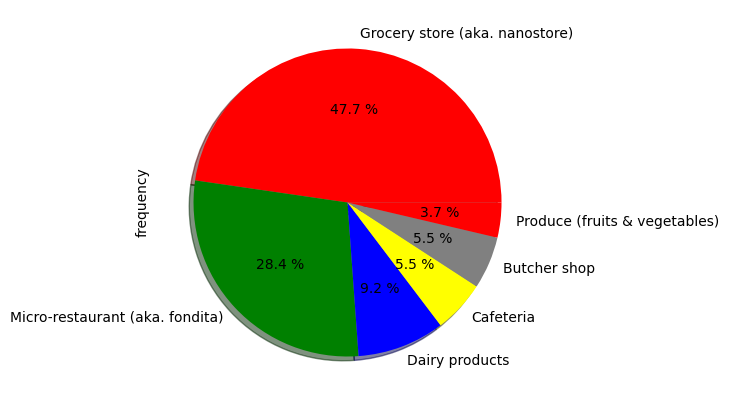

In [ ]:
filtro_index["frequency"].plot(kind="pie", figsize=(10, 5), shadow=True, autopct="%0.1f %%", colors=['red', 'green', 'blue', 'yellow',"grey"])

Text(0, 0.5, 'Frecuencia')

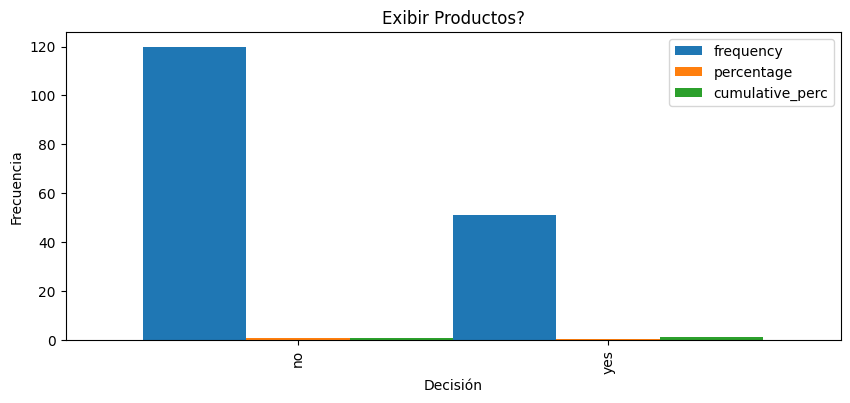

In [ ]:
filtro2_index.plot(kind="bar",width=1,figsize=(10,4))
plt.title("Exibir Productos?")
plt.xlabel("Decisión")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

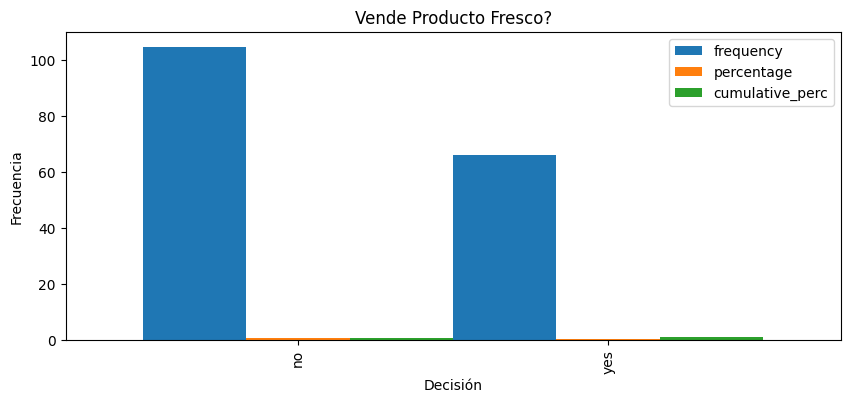

In [ ]:
filtro3_index.plot(kind="bar",width=1,figsize=(10,4))
plt.title("Vende Producto Fresco?")
plt.xlabel("Decisión")
plt.ylabel("Frecuencia")

Text(0.5, 1.0, 'Dispositivos en tienda')

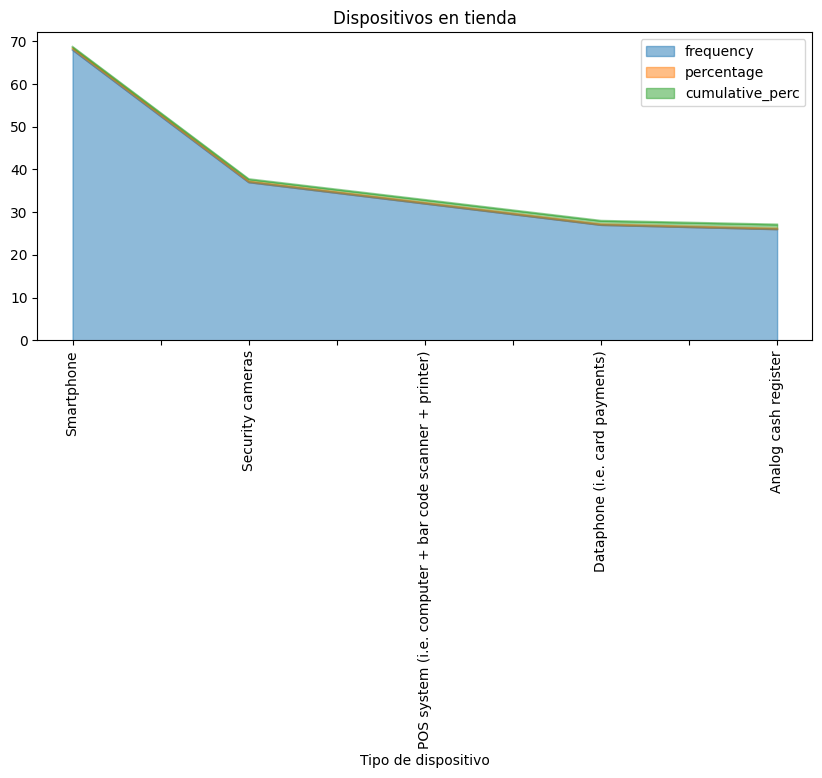

In [54]:
filtro4_index.plot(kind="area",figsize=(10,4),alpha=0.5),plt.xticks(rotation=90)
plt.xlabel("Tipo de dispositivo")
plt.title("Dispositivos en tienda")

Text(0.5, 1.0, 'Incremento de espacio de la tienda')

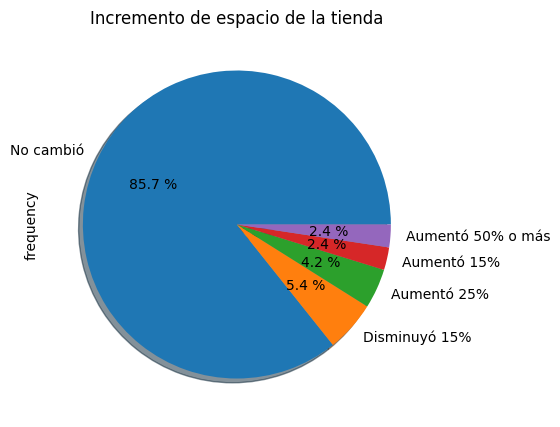

In [ ]:
filtro5_index["frequency"].plot(kind="pie", figsize=(10, 5), shadow=True, autopct="%0.1f %%")
plt.title("Incremento de espacio de la tienda")


Text(0.5, 1.0, 'Incremento de salario en empleados')

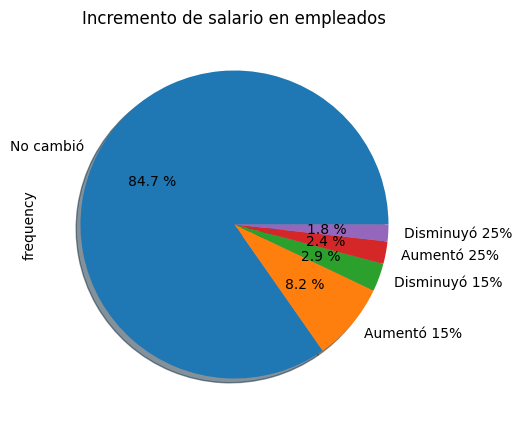

In [ ]:
filtro9_index["frequency"].plot(kind="pie", figsize=(10, 5), shadow=True, autopct="%0.1f %%")
plt.title("Incremento de salario en empleados")

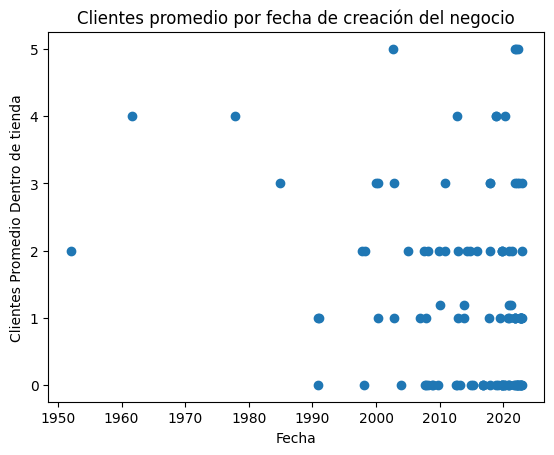

In [ ]:
df['Fecha_creacion'] = pd.to_datetime(df['Fecha_creacion'])
plt.scatter(df['Fecha_creacion'], Fdf['Clientes_en_tienda'])
plt.title("Clientes promedio por fecha de creación del negocio")
plt.xlabel('Fecha')
plt.ylabel('Clientes Promedio Dentro de tienda')
plt.show()

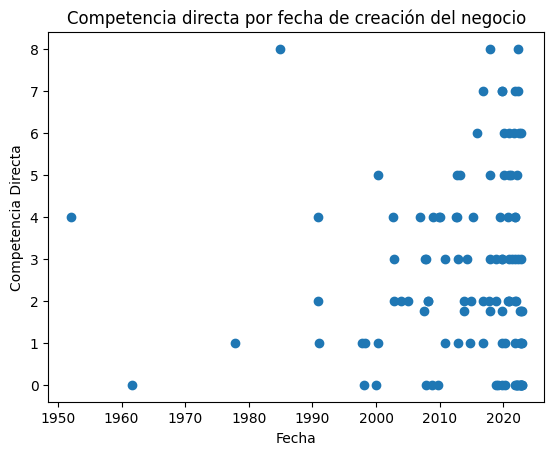

In [ ]:
df['Fecha_creacion'] = pd.to_datetime(df['Fecha_creacion'])
plt.scatter(df['Fecha_creacion'], Fdf['Competidores_directos'])
plt.title("Competencia directa por fecha de creación del negocio")
plt.xlabel('Fecha')
plt.ylabel('Competencia Directa')
plt.show()

Text(0.5, 1.0, 'Registro de Inventarios')

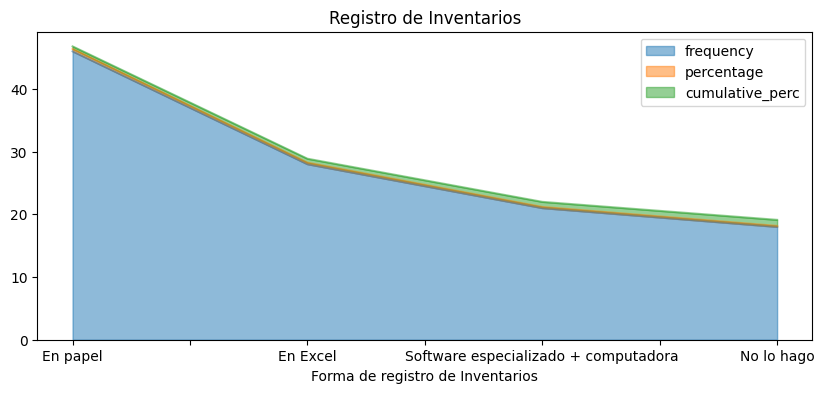

In [83]:
filtro10_index.plot(kind="area",figsize=(10,4),alpha=0.5)
plt.xlabel("Forma de registro de Inventarios")
plt.title("Registro de Inventarios")

Text(0.5, 1.0, 'Tipos de Pago')

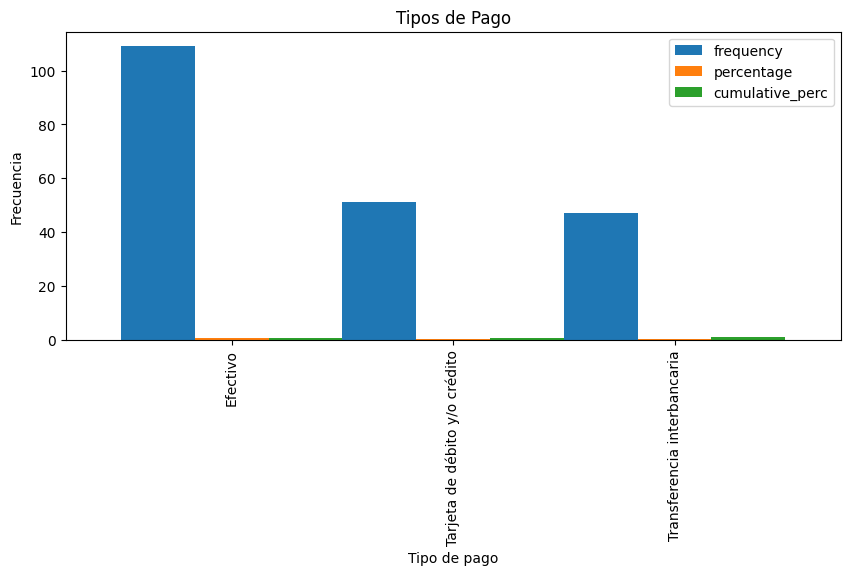

In [58]:
filtro11_index.plot(kind="bar",width=1,figsize=(10,4))
plt.xlabel("Tipo de pago")
plt.ylabel("Frecuencia")
plt.title("Tipos de Pago")

Text(0.5, 1.0, 'Herramientas de relaciones con clientes')

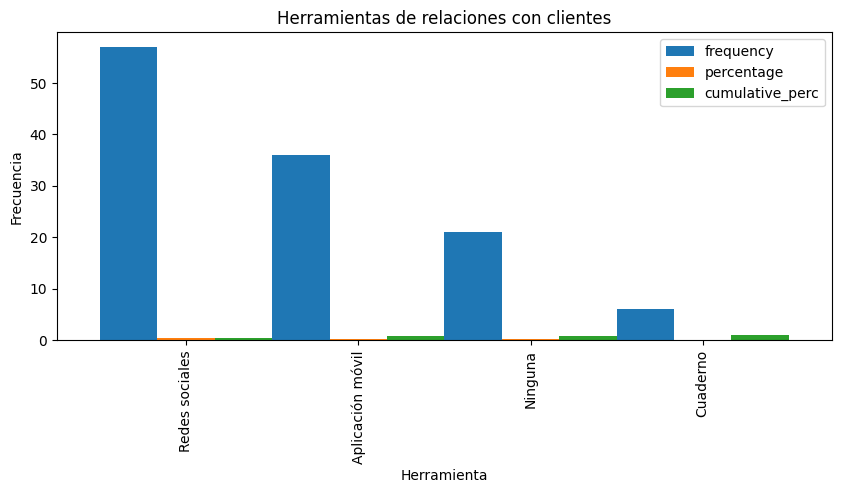

In [59]:
filtro12_index.plot(kind="bar",width=1,figsize=(10,4))
plt.xlabel("Herramienta")
plt.ylabel("Frecuencia")
plt.title("Herramientas de relaciones con clientes")

Text(0.5, 1.0, 'Frecuencia de organizacion de casilleros')

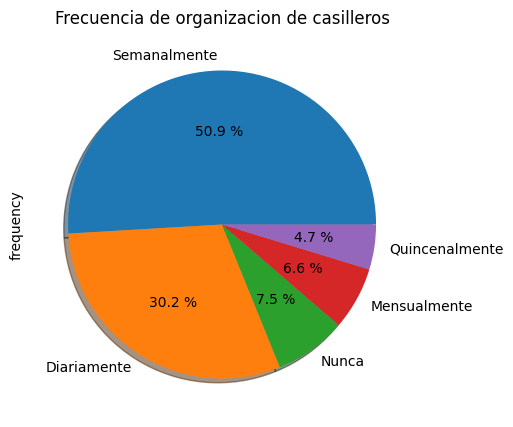

In [70]:
filtro13_index["frequency"].plot(kind="pie", figsize=(10, 5), shadow=True, autopct="%0.1f %%")
plt.title("Frecuencia de organizacion de casilleros")

Text(0.5, 1.0, 'Forma de organización de casilleros (Prioridad)')

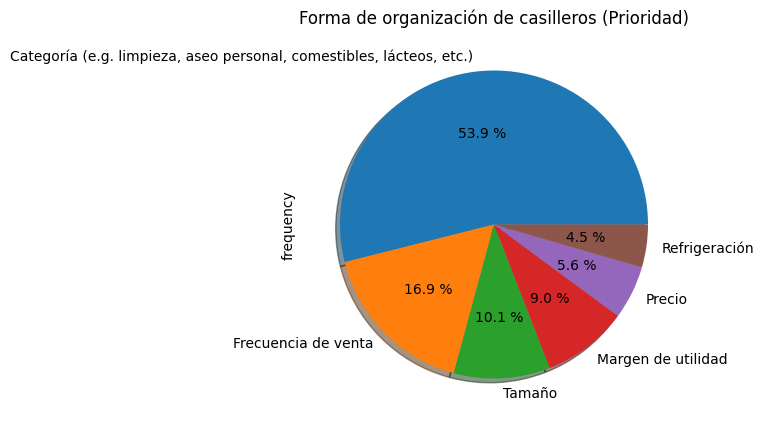

In [71]:
filtro14_index["frequency"].plot(kind="pie", figsize=(10, 5), shadow=True, autopct="%0.1f %%")
plt.title("Forma de organización de casilleros (Prioridad)")

Text(0.5, 1.0, 'Decisión?')

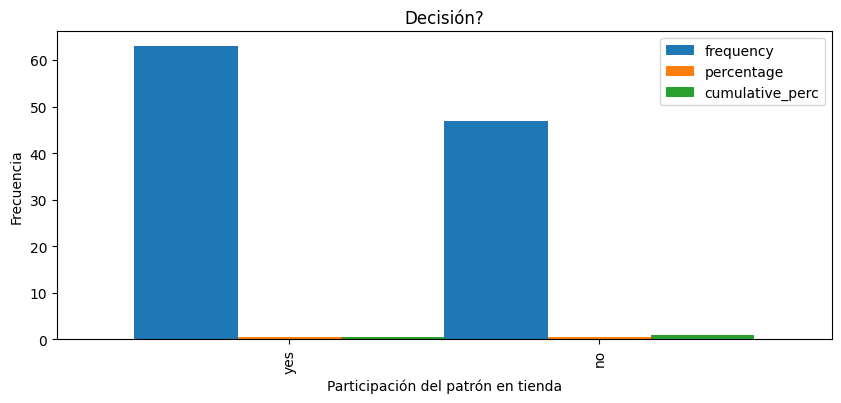

In [72]:
filtro15_index.plot(kind="bar",width=1,figsize=(10,4))
plt.xlabel("Participación del patrón en tienda")
plt.ylabel("Frecuencia")
plt.title("Decisión?")

### Datos de los Clientes

Text(0.5, 1.0, 'Decisión?')

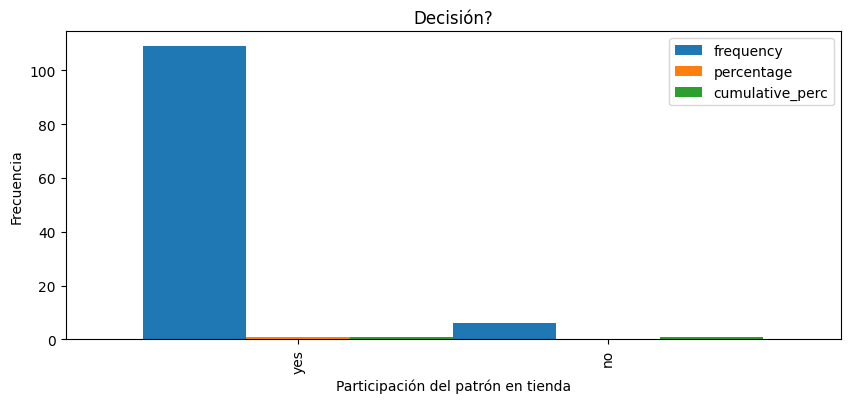

In [80]:
filtro16_index.plot(kind="bar",width=1,figsize=(10,4))
plt.xlabel("Decisión?")
plt.ylabel("Frecuencia")
plt.title("Satisface Necesidades del Cliente?")

Text(0.5, 1.0, 'Distancia a recorrer para llegar a tienda mas cercana')

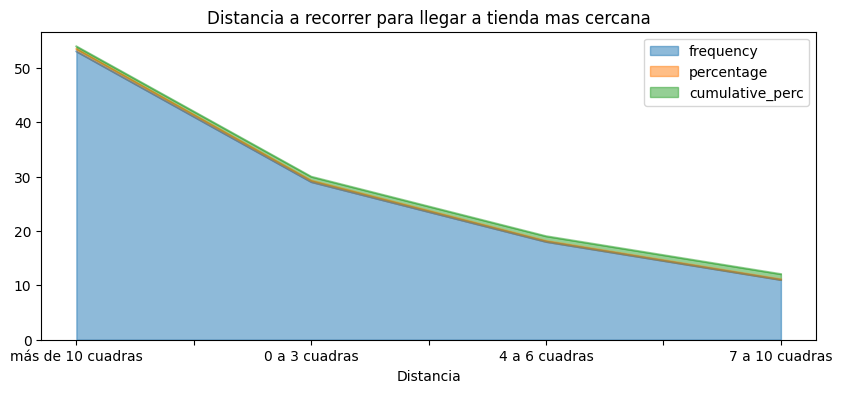

In [82]:
filtro17_index.plot(kind="area",figsize=(10,4),alpha=0.5)
plt.xlabel("Distancia")
plt.title("Distancia a recorrer para llegar a tienda mas cercana")

Text(0.5, 1.0, 'Tipo de transporte que usa el cliente para llegar a la tienda')

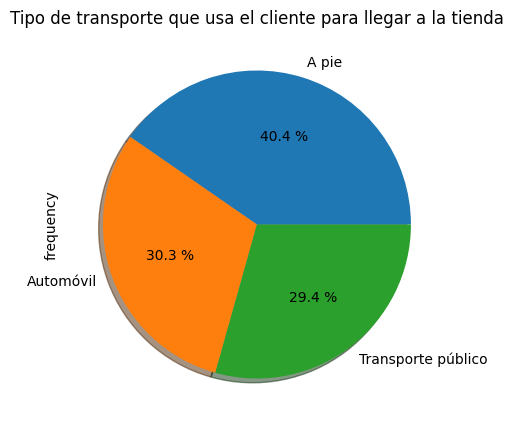

In [87]:
filtro18_index["frequency"].plot(kind="pie", figsize=(10, 5), shadow=True, autopct="%0.1f %%")
plt.title("Tipo de transporte que usa el cliente para llegar a la tienda")

Text(0.5, 1.0, 'Genero del cliente')

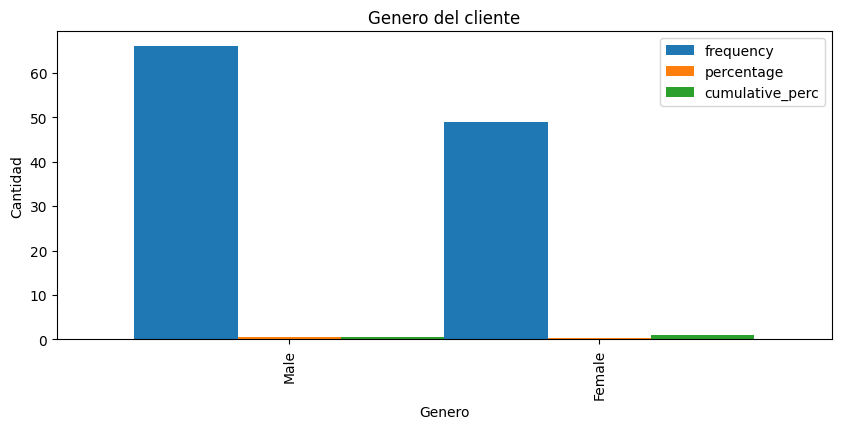

In [84]:
filtro19_index.plot(kind="bar",width=1,figsize=(10,4))
plt.xlabel("Genero")
plt.ylabel("Cantidad")
plt.title("Genero del cliente")

Text(0.5, 1.0, 'Tipo de tienda mas concurrida por los clientes')

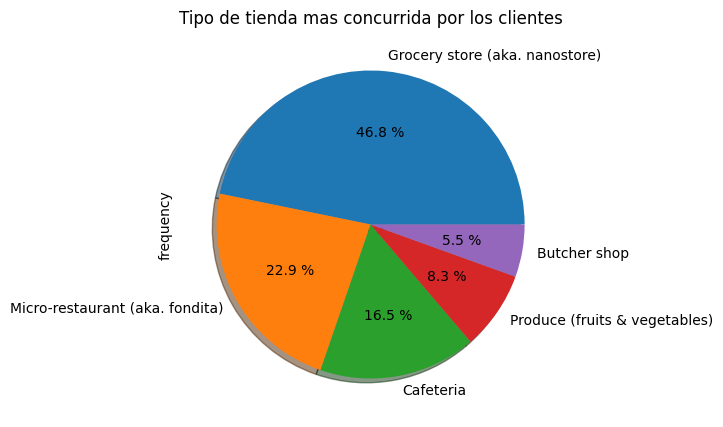

In [85]:
filtro20_index["frequency"].plot(kind="pie", figsize=(10, 5), shadow=True, autopct="%0.1f %%")
plt.title("Tipo de tienda mas concurrida por los clientes")